### Import Libraries
First, import all necessary libraries for data handling, feature extraction, model training, and visualization.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Load and Explore the Dataset
Load the SMS spam collection dataset and take a quick look at its structure.

In [2]:
# Load the dataset
file_path = 'SMSSpamCollection.txt'
data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocess and Split the Dataset
Divide the dataset into training and testing sets. This step is crucial for evaluating the model's performance.

In [3]:
# Preprocess and split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


### Text Vectorization
Convert text data into a format that can be used by machine learning models. In this case, we use the CountVectorizer.

In [4]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


### Train the Naive Bayes Classifier
Use the Multinomial Naive Bayes algorithm to train the classifier on the vectorized text data.

In [5]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

### Model Predictions and Evaluation
Make predictions on the test set and evaluate the model's performance using accuracy and a confusion matrix.

In [6]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

actual_counts = y_test.value_counts()
predicted_counts = pd.Series(y_pred).value_counts()
df_counts = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

### Actual vs Predicted Class Counts Plot

The visual representation of the model's performance is shown in the bar chart below, where the actual and predicted class counts are compared.

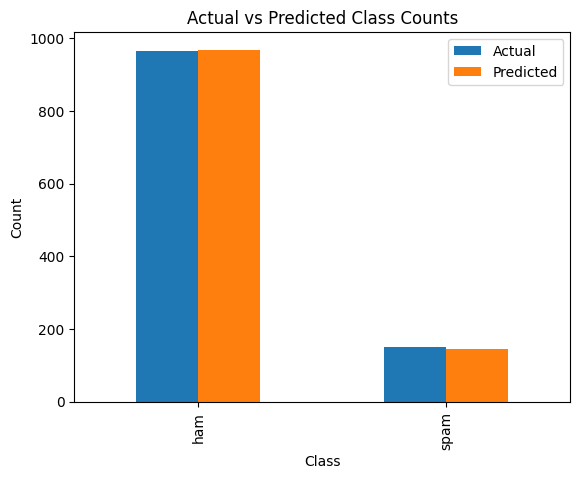

Accuracy: 0.9883408071748879
Confusion Matrix:
 [[961   5]
 [  8 141]]


In [7]:
df_counts.plot(kind='bar')
plt.title('Actual vs Predicted Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

### Classify message function


In [8]:
def classify_message(model, vectorizer, message):
    """
    Classify a message as spam or ham.
    
    :param model: Trained machine learning model
    :param vectorizer: Fitted CountVectorizer
    :param message: String, input text message to classify
    :return: String, predicted class ('spam' or 'ham')
    """
    # Preprocess and vectorize the message
    message_vectorized = vectorizer.transform([message])
    
    # Make a prediction
    prediction = model.predict(message_vectorized)
    
    return prediction[0]

# Example usage
input_message = "Hi, how are you doing"
prediction = classify_message(model, vectorizer, input_message)
print(f"The message is classified as: {prediction}")

The message is classified as: ham
